# Task 5: Exploratory Data Analysis - Sports

## Presented by: Shafrin Sultana

### Importing all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Importing and presenting data regarding match

In [2]:
matchData=pd.read_csv('Match_Data.xls')
matchData.head()


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


### Analyzing match related data

In [3]:
matchData.shape

(756, 18)

In [4]:
matchData.nunique()

id                 756
season              12
city                32
date               546
team1               15
team2               15
toss_winner         15
toss_decision        2
result               3
dl_applied           2
winner              15
win_by_runs         89
win_by_wickets      11
player_of_match    226
venue               41
umpire1             61
umpire2             65
umpire3             25
dtype: int64

### Importing and presenting data regarding deliveries

In [5]:
deliveryData=pd.read_csv('Delivery_Data.xls')
deliveryData.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


### Analyzing deliveries related data

In [6]:
deliveryData.shape

(179078, 21)

In [7]:
deliveryData.nunique()

match_id            756
inning                5
batting_team         15
bowling_team         15
over                 20
ball                  9
batsman             516
non_striker         511
bowler              405
is_super_over         2
wide_runs             6
bye_runs              5
legbye_runs           6
noball_runs           5
penalty_runs          2
batsman_runs          8
extra_runs            7
total_runs           10
player_dismissed    487
dismissal_kind        9
fielder             499
dtype: int64

### City based match data analysis

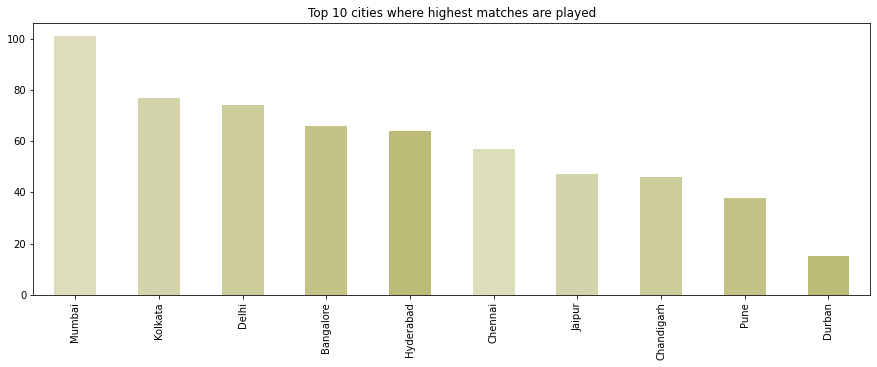

In [8]:
city=matchData['city'].value_counts().sort_values(ascending = False)
city[:10].plot(kind='bar',figsize=(15,5),color=['#ddddbb','#d4d4aa','#cccc99','#c3c388','#bbbb77'],title='Top 10 cities where highest matches are played')
plt.show()

### Venue based match data analysis

<AxesSubplot:title={'center':'Top 10 venues where highest matches are played'}>

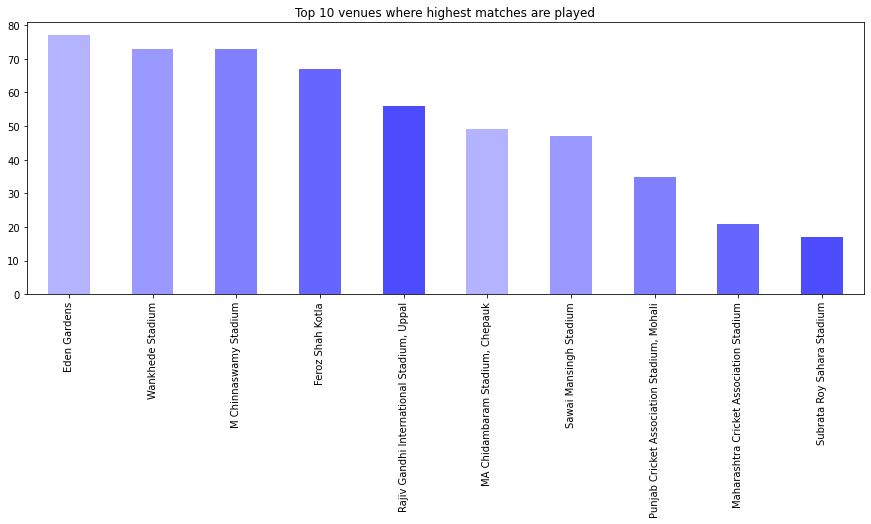

In [9]:
venue=matchData['venue'].value_counts().sort_values(ascending = False)
venue[:10].plot(kind='bar',figsize=(15,5),color=['#b3b3ff','#9999ff','#8080ff','#6666ff','#4d4dff','#b3b3ff','#9999ff','#8080ff','#6666ff','#4d4dff'],title='Top 10 venues where highest matches are played')

### Team performance

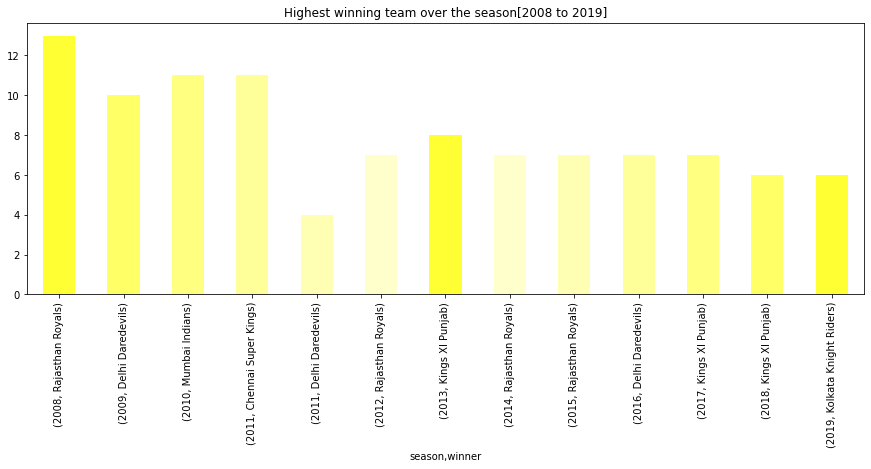

In [10]:
seasonWinner=matchData.groupby('season')['winner'].value_counts()
seasonWinner
seasonWinner[::8].plot(kind='bar',color=['#ffff33','#ffff66','#ffff80','#ffff99','#ffffb3','#ffffcc','#ffff33','#ffffcc','#ffffb3','#ffff99','#ffff80','#ffff66','#ffff33'],title='Highest winning team over the season[2008 to 2019]',figsize=(15,5))
plt.show()

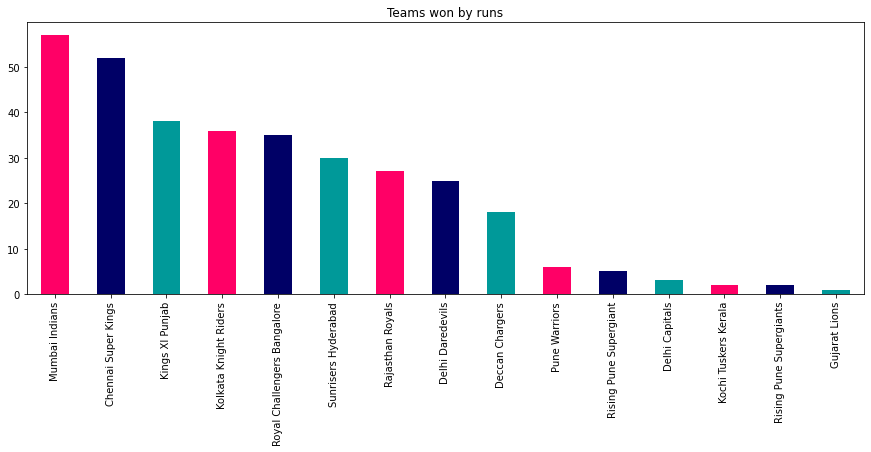

In [11]:
df_filtered = matchData.query('win_by_runs > 0')
winByRuns=df_filtered['winner'].value_counts()
winByRuns.plot(kind='bar',color=['#ff0066','#000066','#009999'],title='Teams won by runs',figsize=(15,5))
plt.show()

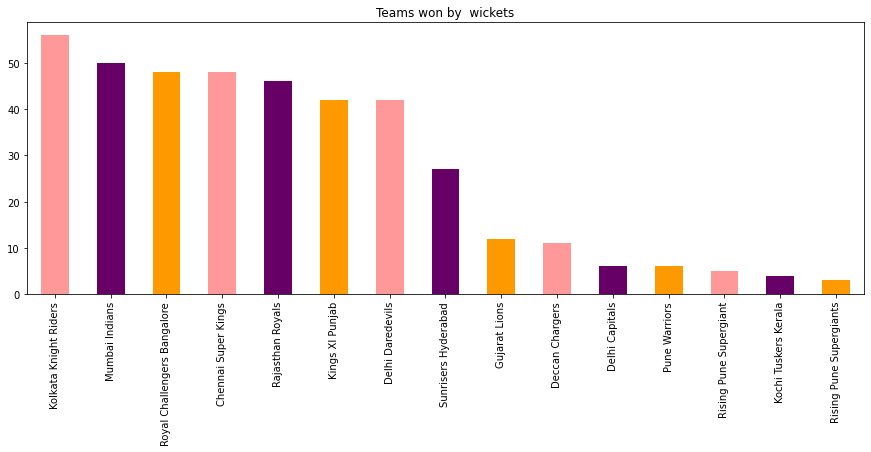

In [12]:
df_filtered = matchData.query('win_by_wickets > 0')
winByWickets=df_filtered['winner'].value_counts()
winByWickets.plot(kind='bar',color=['#ff9999','#660066','#ff9900'],title='Teams won by  wickets',figsize=(15,5))
plt.show()

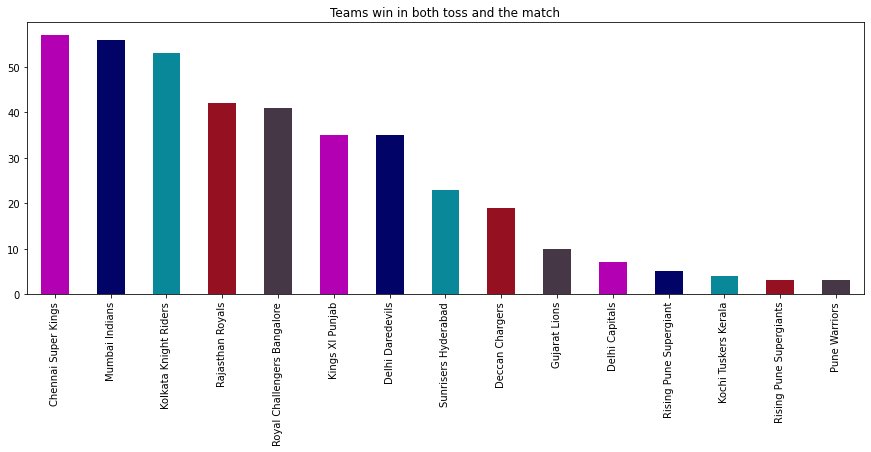

In [13]:
df_filtered1 = matchData.query('winner==toss_winner')
winByTossWinner=df_filtered1['toss_winner'].value_counts()
winByTossWinner.plot(kind='bar',color=['#b300b3','#010466','#098899','#951121','#463746'],title='Teams win in both toss and the match',figsize=(15,5))
plt.show()

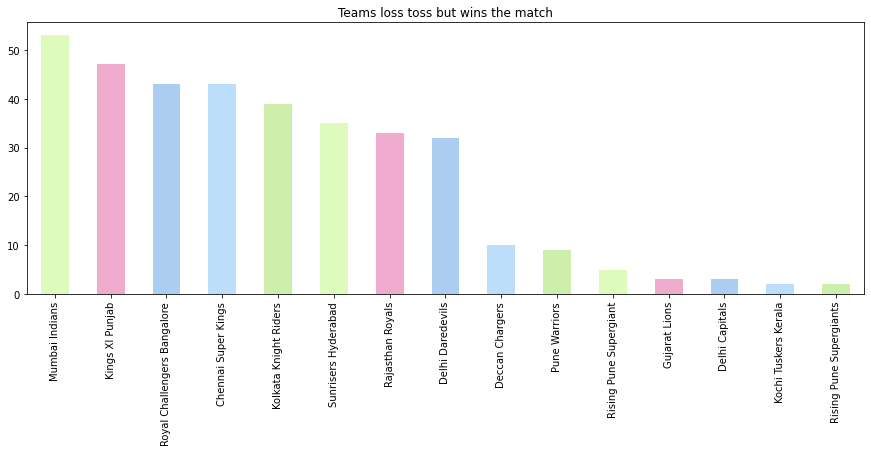

In [14]:
df_filtered2 = matchData.query('toss_winner!=winner')
winByTosslooser =df_filtered2['winner'].value_counts()
winByTosslooser.plot(kind='bar',color=['#defabc','#efabcd','#abcdef','#bcdefa','#cdefab'],title='Teams loss toss but wins the match',figsize=(15,5))
plt.show()

In [15]:
teamName=matchData['team1'].unique()
tossWinner=[]
for i in range(len(teamName)):
    tossWinner.append(winByTossWinner[teamName[i]])
tosslooser=[]
for i in range(len(teamName)):
    tosslooser.append(winByTosslooser[teamName[i]])
successfulTeamByToss=pd.DataFrame({'Team Name':teamName,'Won by Toss':tossWinner,'Loss By Toss':tosslooser})
successfulTeamByToss

,Team Name,Won by Toss,Loss By Toss
0,Sunrisers Hyderabad,23,35
1,Mumbai Indians,56,53
2,Gujarat Lions,10,3
3,Rising Pune Supergiant,5,5
4,Royal Challengers Bangalore,41,43
5,Kolkata Knight Riders,53,39
6,Delhi Daredevils,35,32
7,Kings XI Punjab,35,47
8,Chennai Super Kings,57,43
9,Rajasthan Royals,42,33


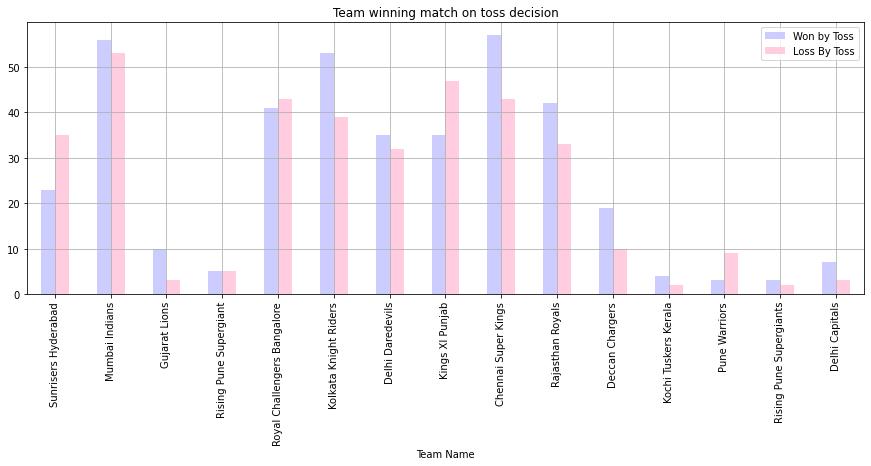

In [16]:
successfulTeamByToss.plot(kind='bar',x='Team Name',color=['#ccccff','#ffcce0'],title='Team winning match on toss decision',figsize=(15,5),)
plt.grid()
plt.show()

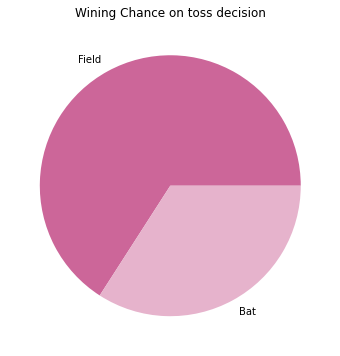

In [17]:
winByTossDecision=df_filtered1['toss_decision'].value_counts()

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(winByTossDecision,labels=['Field','Bat'],colors=['#cc6699','#e6b3cc'])
ax.set_title('Wining Chance on toss decision')
plt.show()

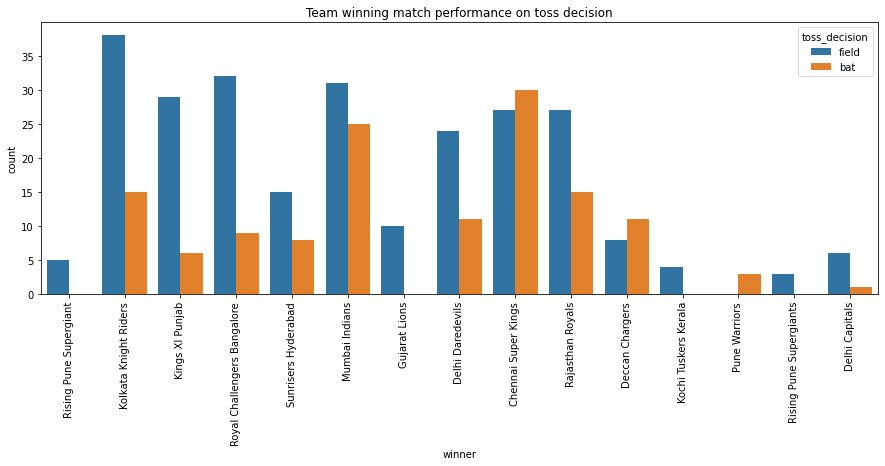

In [18]:
fig, ax = plt.subplots(figsize=(15, 5))
#plt.figure(figsize=(18,10))
sns.countplot('winner',hue='toss_decision',data=df_filtered1)
ax.set_title('Team winning match performance on toss decision')
plt.xticks(rotation=90)
plt.show()

### Player Performance

In [19]:
matchData['player_of_match'].nunique()

226

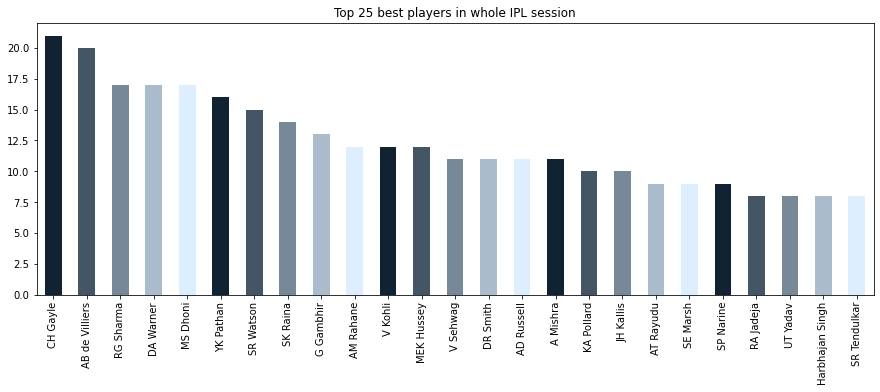

In [20]:
bestPlayer=matchData['player_of_match'].value_counts().sort_values(ascending = False)
bestPlayer[:25].plot(kind='bar',color=['#112233','#445566','#778899','#aabbcc','#ddeeff'],title='Top 25 best players in whole IPL session',figsize=(15,5))
plt.show()

In [21]:
matchData['umpire1'].nunique()

61

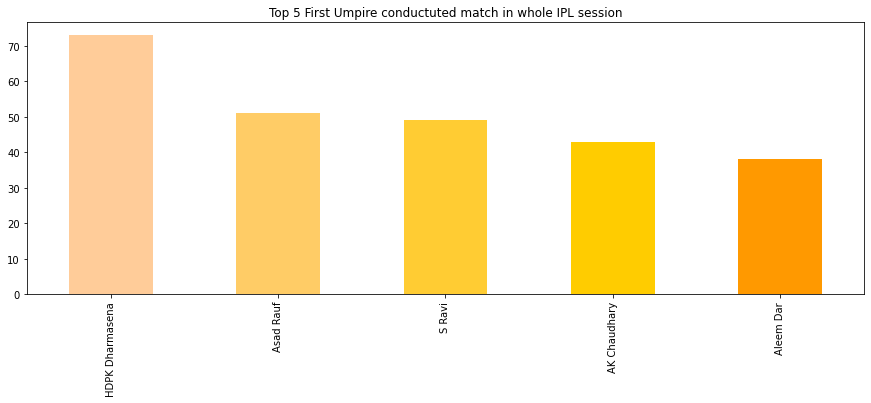

In [22]:
umpireFirst=matchData['umpire1'].value_counts()
umpireFirst[:5].plot(kind='bar',color=['#ffcc99','#ffcc66','#ffcc33','#ffcc00','#ff9900'],title='Top 5 First Umpire conductuted match in whole IPL session',figsize=(15,5))
plt.show()

In [23]:
matchData['umpire2'].nunique()

65

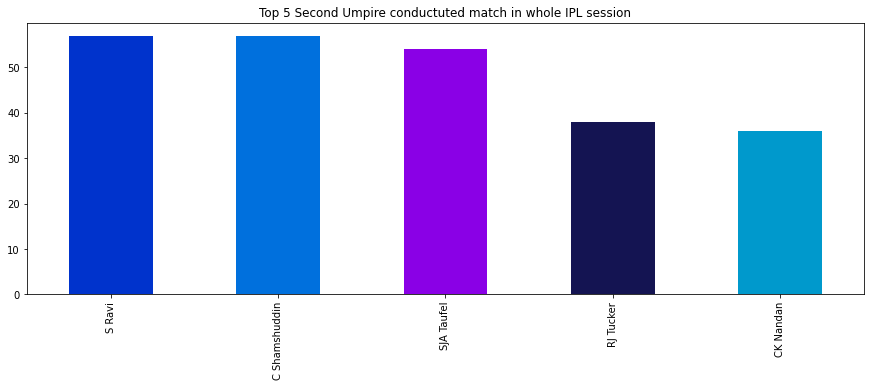

In [24]:
umpireSecond=matchData['umpire2'].value_counts()
umpireSecond[:5].plot(kind='bar',color=['#0033cc','#0070dd','#8a00e6','#141452','#0099cc'],title='Top 5 Second Umpire conductuted match in whole IPL session',figsize=(15,5))
plt.show()

In [25]:
matchData['umpire3'].nunique()

25

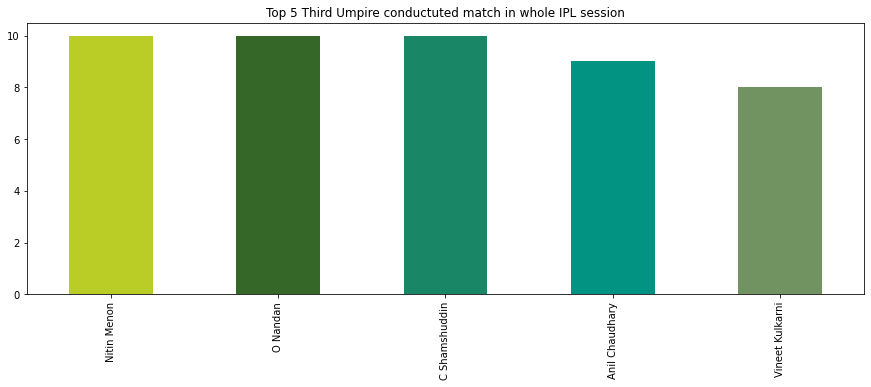

In [26]:
umpireThird=matchData['umpire3'].value_counts()
umpireThird[:5].plot(kind='bar',color=['#bacd27','#356728','#198765','#029383','#719362'],title='Top 5 Third Umpire conductuted match in whole IPL session',figsize=(15,5))
plt.show()

### Merge Season in the Delivery Table

In [27]:
seasonInsert =pd.DataFrame({'ID':matchData['id'],'Season':matchData['season']})
deliveryData=pd.merge(deliveryData,seasonInsert,left_on='match_id',right_on='ID')
deliveryData

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,ID,Season
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,NaN,NaN,NaN,1,2017
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,NaN,NaN,NaN,1,2017
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,4,0,4,NaN,NaN,NaN,1,2017
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,NaN,NaN,NaN,1,2017
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,2,2,NaN,NaN,NaN,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,1,0,1,NaN,NaN,NaN,11415,2019
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,2,0,2,NaN,NaN,NaN,11415,2019
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,1,0,1,SR Watson,run out,KH Pandya,11415,2019
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,2,0,2,NaN,NaN,NaN,11415,2019


### Analyzing scores of the seasons

<AxesSubplot:title={'center':'Total Run over the seasons'}, xlabel='Season'>

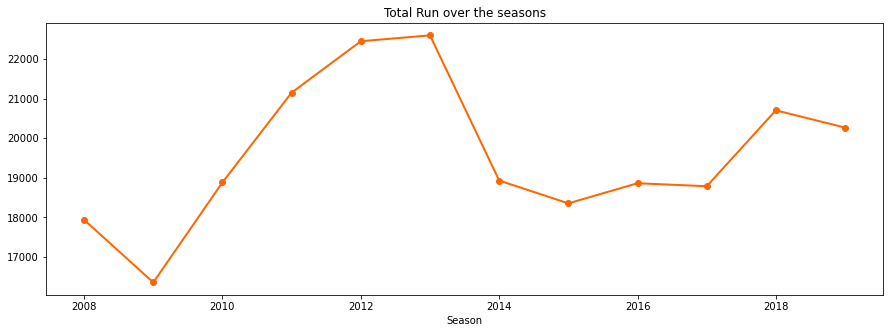

In [28]:
runTotal=deliveryData.groupby('Season')['total_runs'].sum()
runTotal.plot(kind='line',marker='o',figsize=(15,5),lw=2,color='#ff6600',title='Total Run over the seasons')


<AxesSubplot:title={'center':'Total Six over the seasons'}, xlabel='Season'>

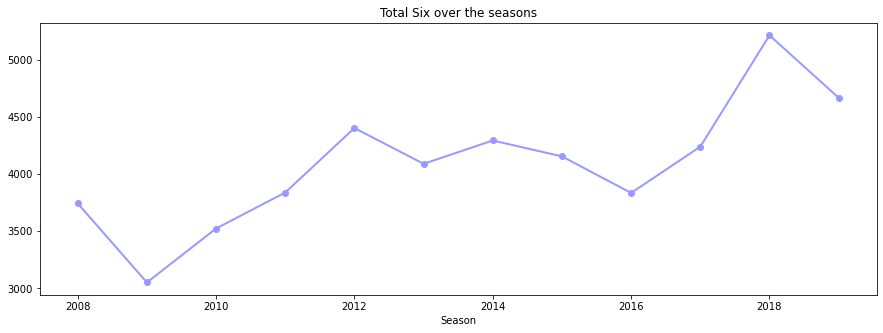

In [29]:
sixTotal=deliveryData.query('batsman_runs==6').groupby('Season')['total_runs'].sum()
sixTotal.plot(kind='line',marker='o',figsize=(15,5),lw=2,color='#9999ff',title='Total Six over the seasons')

<AxesSubplot:title={'center':'Total Four over the seasons'}, xlabel='Season'>

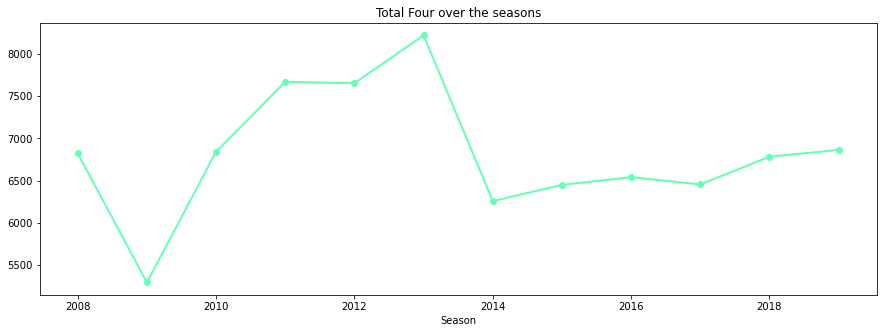

In [30]:
fourTotal=deliveryData.query('batsman_runs==4').groupby('Season')['total_runs'].sum()
fourTotal.plot(kind='line',marker='o',figsize=(15,5),lw=2,color='#66ffb3',title='Total Four over the seasons')

### Batsman Performance

<AxesSubplot:title={'center':'Top 10 consistent batsmans'}>

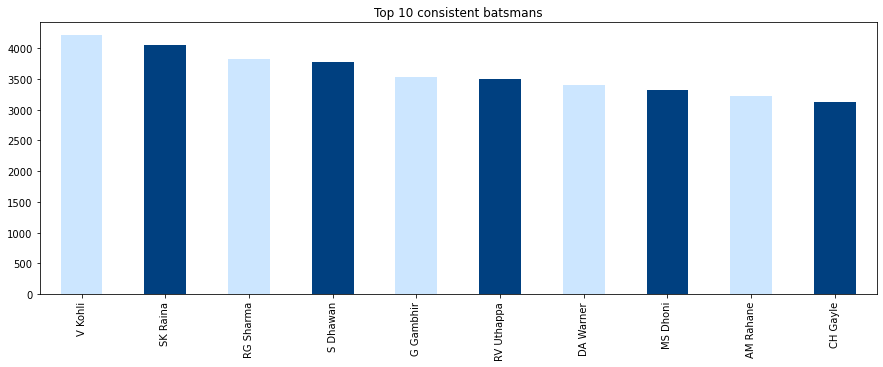

In [31]:
batsman=deliveryData['batsman'].value_counts().sort_values(ascending = False)
batsman[:10].plot(kind='bar',color=['#cce6ff','#004080'],figsize=(15,5),title='Top 10 consistent batsmans')

<AxesSubplot:title={'center':'Top 10 batsman strikes the highest sixes'}, xlabel='batsman,total_runs'>

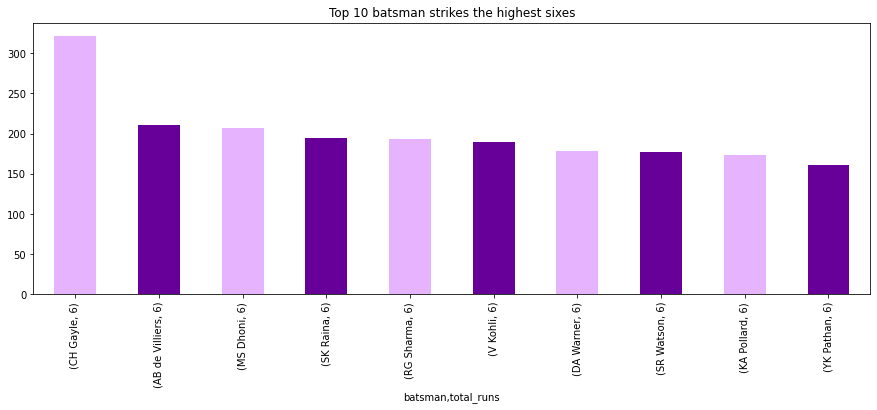

In [32]:
sixBatsman=deliveryData.query('batsman_runs==6').groupby('batsman')['total_runs'].value_counts().sort_values(ascending = False)
sixBatsman[:10].plot(kind='bar',color=['#e6b3ff','#660099'],figsize=(15,5),title='Top 10 batsman strikes the highest sixes')

<AxesSubplot:title={'center':'Top 10 batsman strikes the highest four'}, xlabel='batsman'>

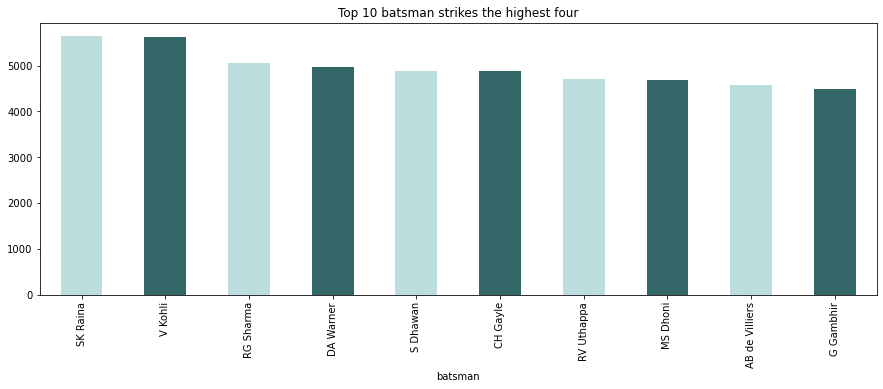

In [33]:
highestRun=deliveryData.groupby('batsman')['total_runs'].sum().sort_values(ascending = False)
highestRun[:10].plot(kind='bar',color=['#bbdddd','#336666'],figsize=(15,5),title='Top 10 batsman strikes the highest four')

### Bowler Performance

<AxesSubplot:title={'center':'Top 10 bowlers who bowled the highest'}>

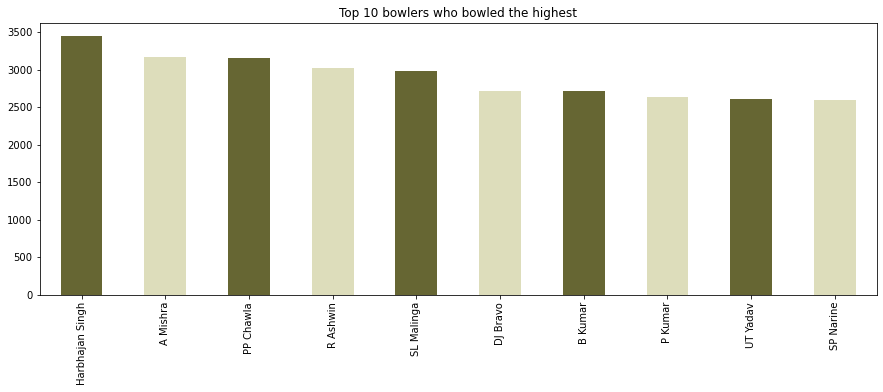

In [34]:
highestBowler=deliveryData['bowler'].value_counts().sort_values(ascending = False)
highestBowler[:10].plot(kind='bar',color=['#666633','#ddddbb'],figsize=(15,5),title='Top 10 bowlers who bowled the highest')

<AxesSubplot:title={'center':'Top 10 bowlers gave the highest dot ball'}, xlabel='bowler'>

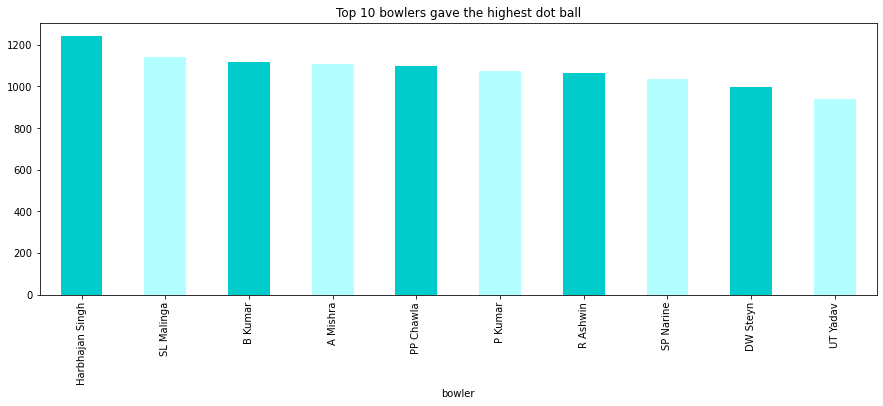

In [35]:
dotBall=deliveryData.query('total_runs==0').groupby('bowler')['total_runs'].count().sort_values(ascending = False)
dotBall[:10].plot(kind='bar',color=['#00cccc','#b3ffff'],figsize=(15,5),title='Top 10 bowlers gave the highest dot ball')

<AxesSubplot:title={'center':'Top 10 Wicket Taker bowlers'}, xlabel='bowler'>

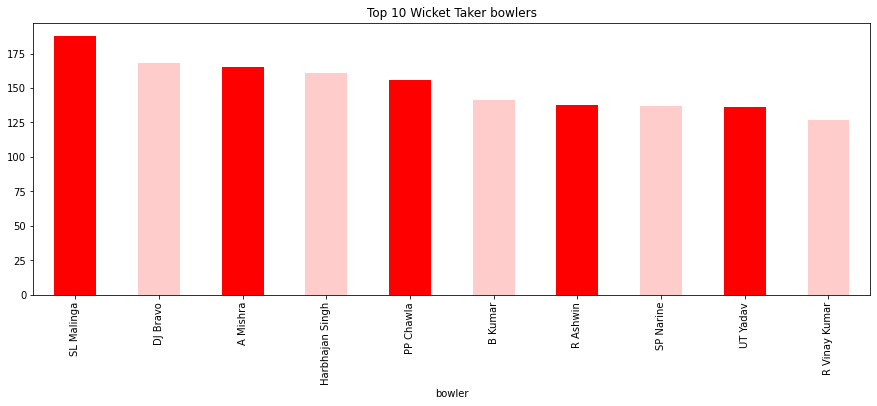

In [36]:
wicketTaker=deliveryData.groupby('bowler')['player_dismissed'].count().sort_values(ascending = False)
wicketTaker[:10].plot(kind='bar',color=['#ff0000','#ffcccc'],figsize=(15,5),title='Top 10 Wicket Taker bowlers')

<AxesSubplot:title={'center':'Top 10 bowlers who give extra runs'}, xlabel='bowler'>

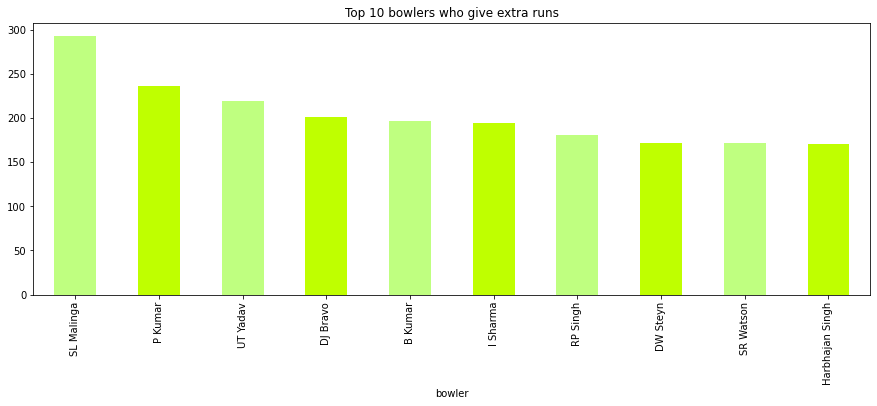

In [37]:
extraRun=deliveryData.query('extra_runs!=0').groupby('bowler')['extra_runs'].sum().sort_values(ascending = False)
extraRun[:10].plot(kind='bar',figsize=(15,5),color=['#bfff80','#bfff00'],title='Top 10 bowlers who give extra runs')

# Thank You so much